In [1]:
from Templates import *
%matplotlib inline

In [2]:
# Part 1.1
x,y = DatasetLoader(0).loadDataset()
cv = CrossValidate(x,y)
cv.k_fold(folds=5)


fold: 2, Singular Matrix
fold: 3, Singular Matrix


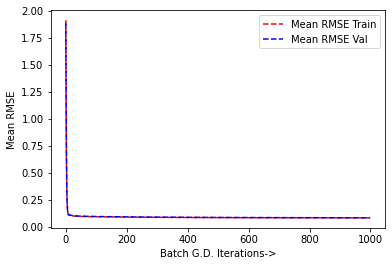

In [4]:
plt.plot(range(cv.params['epochs']), cv.params['trainRMSE_G'],"r--",label = "Mean RMSE Train")
plt.plot(range(cv.params['epochs']),  cv.params['valRMSE_G'],"b--",label = "Mean RMSE Val")
plt.legend()
plt.ylabel('Mean RMSE')
plt.xlabel('Batch G.D. Iterations->')
plt.savefig('p1.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
print(cv.params['trainRMSE_N'])
print(cv.params['valRMSE_N'])

[1.6053891719466324, nan, nan, 1.1367230553375038, 2.0903646378568403]
[1.333074400039038, nan, nan, 0.9520675553153591, 1.5580328992910049]


In [6]:

# Part 1.2
cv.newVal2Test(cv.leastValRMSE())

mParams_1 = {"lam":[0.01, 0.1, 0.5, 1], "lr":[1e-5 , 1e-4,1e-3 ], "reg": ['\"l1\"'],'epochs':[500]} # l1
cv.GridSearch(LinearRegressorGradient,mParams_1,folds=5)
config_l1b = cv.getBestConfig()

mParams_2 = {"lam":[0.01, 0.1, 0.5, 1], "lr":[1e-6 , 1e-4,1e-3 ], "reg": ['\"l2\"'],'epochs':[500]} # l2
cv.GridSearch(LinearRegressorGradient,mParams_2,folds=5)
config_l2b = cv.getBestConfig()

m1 = LinearRegressorGradient(**eval(config_l1b))
m1.fit(x_train = cv.params['x_new'],y_train=cv.params['y_new'])
m2 = LinearRegressorGradient(**eval(config_l2b))
m2.fit(x_train=cv.params['x_new'],y_train=cv.params['y_new'])

print("L1 RMSE Loss(test set): %f"%(m1.rmseLoss(y_val=cv.params['y_ntest'],x_val=cv.params['x_ntest'])))
print(config_l1b)
print("L2 RMSE Loss(test set): %f"%(m2.rmseLoss(y_val=cv.params['y_ntest'],x_val=cv.params['x_ntest'])))
print(config_l2b)




/home/sirius/.local/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/sirius/Desktop/Quick Access/ML/ECE363/assgn1/Submission/Templates.py:75: RuntimeWarning: overflow encountered in square
  loss = np.square(y_true - y_predicted).mean()
/home/sirius/Desktop/Quick Access/ML/ECE363/assgn1/Submission/Templates.py:50: RuntimeWarning: overflow encountered in square
  trainRMSE[i] = np.sqrt(np.square(y_train - y_train_predicted).mean())
/home/sirius/Desktop/Quick Access/ML/ECE363/assgn1/Submission/Templates.py:82: RuntimeWarning: overflow encountered in multiply
  grad = -2*np.matmul(x.T,(y_true - y_predicted))
/home/sirius/Desktop/Quick Access/ML/ECE363/assgn1/Submission/Templates.py:82: RuntimeWarning: invalid value encountered in matmul
  grad = -2*np.matmul(x.T,(y_true - y_predicted))
/home/sirius/Desktop/Quick Access/ML/ECE363/assgn1/Submission/Templates.py:54: Runti

time taken: 10.934430
time taken: 12.259885
L1 RMSE Loss(test set): 0.064344
dict(lam=1,lr=0.0001,reg="l1",epochs=500)
L2 RMSE Loss(test set): 0.064011
dict(lam=0.1,lr=0.0001,reg="l2",epochs=500)


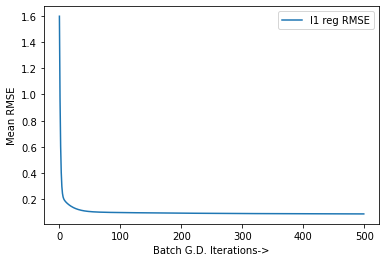

In [7]:
plt.plot(range(m1.params['epochs']), m1.params['trainRMSE'],label = 'l1 reg RMSE')
# plt.plot(range(m.params['epochs']), m2.params['trainLoss'],label = 'l1 reg LOSS')
plt.legend()
plt.ylabel('Mean RMSE')
plt.xlabel('Batch G.D. Iterations->')
plt.savefig('p3.png', dpi=300, bbox_inches='tight')
plt.show()

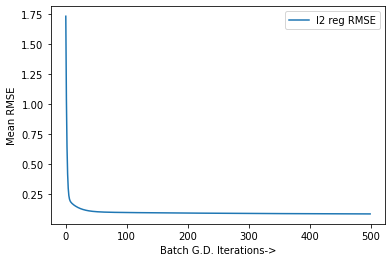

In [8]:
plt.plot(range(m2.params['epochs']), m2.params['trainRMSE'],label = 'l2 reg RMSE')
# plt.plot(range(m2.params['epochs']), m2.params['trainLoss'],label = 'l2 reg LOSS')
plt.legend()
plt.ylabel('Mean RMSE')
plt.xlabel('Batch G.D. Iterations->')
plt.savefig('p4.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:


# Part 1.3
x,y = DatasetLoader(1).loadDataset()

m1 = LinearRegressorGradient(lam = None , reg = None, epochs=1000)
m1.fit(x_train = x,y_train =y)

m2 = LinearRegressorGradient(lam = 0.5, reg = 'l1', epochs= 1000)
m3 = LinearRegressorGradient(lam = 0.5, reg = 'l2', epochs= 1000)
m2.fit(x_train = x,y_train =y )
m3.fit(x_train = x,y_train =y)
m4 = LinearRegressorNormal()
m4.fit(x_train=x,y_train=y)

y1 = m1.predict(x)
y2 = m2.predict(x)
y3 = m3.predict(x)
y4 = m4.predict(x)






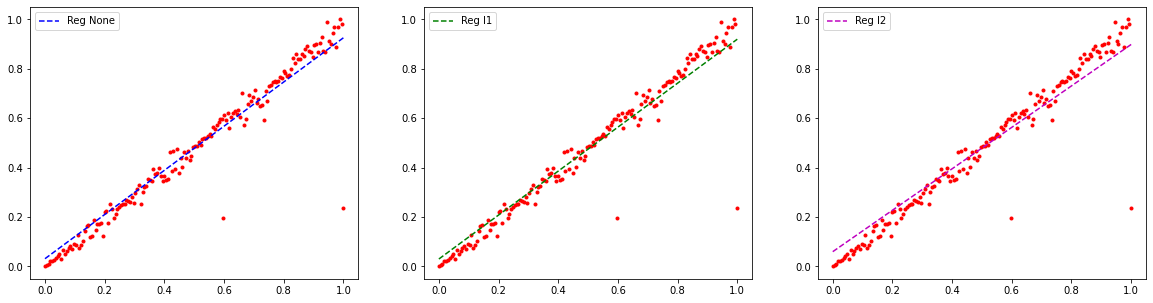

In [10]:
plt.rcParams['figure.figsize'] = (20, 5)

plt.subplot(1,3,1)
plt.scatter(x,y,c='r',marker='.')
plt.plot(x,y1,'b--',label = 'Reg None')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(x,y,c='r',marker='.')
plt.plot(x,y2,'g--',label = 'Reg l1')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(x,y,c='r',marker='.')
plt.plot(x,y3,'m--',label = 'Reg l2')
plt.legend()

# plt.plot(x,y4,'y--',label = 'Normal Eq')
plt.savefig('p5.png', dpi=300, bbox_inches='tight')
plt.show()